#### Question: Can we predict whether a customer will refer a friend or not ?

#### Expectations:

The question of predicting whether a customer will recommend the company, is closely related to Net Promoter Score (NPS),which can be extremely useful for the telecommunications company. The NPS is a widely used metric that measures customer loyalty and satisfaction, with a focus on the likelihood of customers recommending the company to others.

There are several reasons why predicting the customer recommending the company can be valuable:

Improving customer retention: Customers who are more likely to recommend the company are also more likely to stay with the company. So this can help identify customers who are at risk of leaving, allowing the company to take proactive measures to retain them.

Identifying areas for improvement: Customers who are less likely to recommend the company may have specific pain points or areas of dissatisfaction. Answering this question can help the company identify these areas and prioritize efforts to address them.

Driving growth: Customers who are more likely to recommend the company can help drive new customer acquisition and revenue growth through positive word-of-mouth referrals. Answering this question can help the company identify customers who are likely to be brand advocates and target them for additional promotions or incentives.

In terms of expectations, predicting the NPS can help the company gain a deeper understanding of its customers and their preferences, as well as drive improvements in customer retention, satisfaction, and revenue growth. The insights gained from answering this question can be used to inform targeted marketing and customer retention strategies, ultimately leading to increased customer loyalty and business success.

#### EDA:

In [1]:
# Importing the libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from collections import Counter


In [2]:
# Load the first dataset from ../Dataset/Telco_customer_churn_services.xlsx
services = pd.read_excel('../Dataset/Telco_customer_churn_services.xlsx')

In [3]:
# Load the second dataset from ../Dataset/Telco_customer_churn.xlsx
compound = pd.read_excel('../Dataset/Telco_customer_churn.xlsx')

In [4]:
# Load the data from /Dataset/Telco_customer_churn_demographics.xlsx
demographics = pd.read_excel('../Dataset/Telco_customer_churn_demographics.xlsx')

In [5]:
# rename the column to match the column name in the dataset
compound.rename(columns={'CustomerID':'Customer ID'}, inplace=True)

In [6]:
# Join the two datasets on the column 'Customer ID'
dataset1 = pd.merge(demographics, compound, on='Customer ID')

In [7]:
# check the data types of the columns
dataset1.dtypes

Customer ID              object
Count_x                   int64
Gender_x                 object
Age                       int64
Under 30                 object
Senior Citizen_x         object
Married                  object
Dependents_x             object
Number of Dependents      int64
Count_y                   int64
Country                  object
State                    object
City                     object
Zip Code                  int64
Lat Long                 object
Latitude                float64
Longitude               float64
Gender_y                 object
Senior Citizen_y         object
Partner                  object
Dependents_y             object
Tenure Months             int64
Phone Service            object
Multiple Lines           object
Internet Service         object
Online Security          object
Online Backup            object
Device Protection        object
Tech Support             object
Streaming TV             object
Streaming Movies         object
Contract

In [8]:
my_columns = ['Gender_x', 'Age', 'Married',
              'Number of Dependents', 'Churn Value', 'Tenure Months', 'Churn Score', 'Monthly Charges', 'Customer ID']

dataset1 = dataset1[my_columns]

In [9]:
dataset = pd.merge(services, dataset1, on='Customer ID')

In [10]:
dataset.dtypes

Customer ID                           object
Count                                  int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

In [11]:
my_columns += ['Phone Service', 'Internet Service', 'Multiple Lines',
               'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data', 'Total Revenue', 'Referred a Friend']

dataset = dataset[my_columns]

In [12]:
dataset.dtypes

Gender_x                   object
Age                         int64
Married                    object
Number of Dependents        int64
Churn Value                 int64
Tenure Months               int64
Churn Score                 int64
Monthly Charges           float64
Customer ID                object
Phone Service              object
Internet Service           object
Multiple Lines             object
Online Security            object
Online Backup              object
Device Protection Plan     object
Premium Tech Support       object
Unlimited Data             object
Total Revenue             float64
Referred a Friend          object
dtype: object

In [13]:
# rename Gender_x to gender
dataset.rename(columns={'Gender_x' : 'Gender'},inplace=True)

In [14]:
if 'Customer ID' in dataset.columns:
    dataset.drop('Customer ID', axis=1, inplace=True)

In [15]:
dataset = pd.get_dummies(dataset,drop_first=True)

In [16]:
dataset.head()

,Age,Number of Dependents,Churn Value,Tenure Months,Churn Score,Monthly Charges,Total Revenue,Gender_Male,Married_Yes,Phone Service_Yes,Internet Service_Yes,Multiple Lines_Yes,Online Security_Yes,Online Backup_Yes,Device Protection Plan_Yes,Premium Tech Support_Yes,Unlimited Data_Yes,Referred a Friend_Yes
0,78,0,1,1,100,39.65,59.65,1,0,0,1,0,0,0,1,0,0,0
1,74,1,1,8,69,80.65,1024.10,0,1,1,1,1,0,1,0,0,1,1
2,71,3,1,18,81,95.45,1910.88,1,0,1,1,1,0,0,0,0,1,0
3,78,1,1,25,88,98.50,2995.07,0,1,1,1,0,0,1,1,0,1,1
4,80,1,1,37,67,76.50,3102.36,0,1,1,1,1,0,0,0,0,1,1


In [17]:
if 'Married_Yes' in dataset.columns:
    dataset.rename(columns={'Married_Yes':'Married','Gender_Male': 'Gender','Phone Service_Yes':'Phone Service', 'Internet Service_Yes':'Internet Service', 'Multiple Lines_Yes':'Multiple Lines',
                        'Online Security_Yes':'Online Security', 'Online Backup_Yes':'Online Backup','Device Protection Plan_Yes':'Device Protection Plan',
                        'Premium Tech Support_Yes':'Premium Tech Support','Unlimited Data_Yes':'Unlimited Data','Referred a Friend_Yes':'Referred a Friend'}, inplace=True)

In [18]:
dataset.head()

,Age,Number of Dependents,Churn Value,Tenure Months,Churn Score,Monthly Charges,Total Revenue,Gender,Married,Phone Service,Internet Service,Multiple Lines,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Unlimited Data,Referred a Friend
0,78,0,1,1,100,39.65,59.65,1,0,0,1,0,0,0,1,0,0,0
1,74,1,1,8,69,80.65,1024.10,0,1,1,1,1,0,1,0,0,1,1
2,71,3,1,18,81,95.45,1910.88,1,0,1,1,1,0,0,0,0,1,0
3,78,1,1,25,88,98.50,2995.07,0,1,1,1,0,0,1,1,0,1,1
4,80,1,1,37,67,76.50,3102.36,0,1,1,1,1,0,0,0,0,1,1


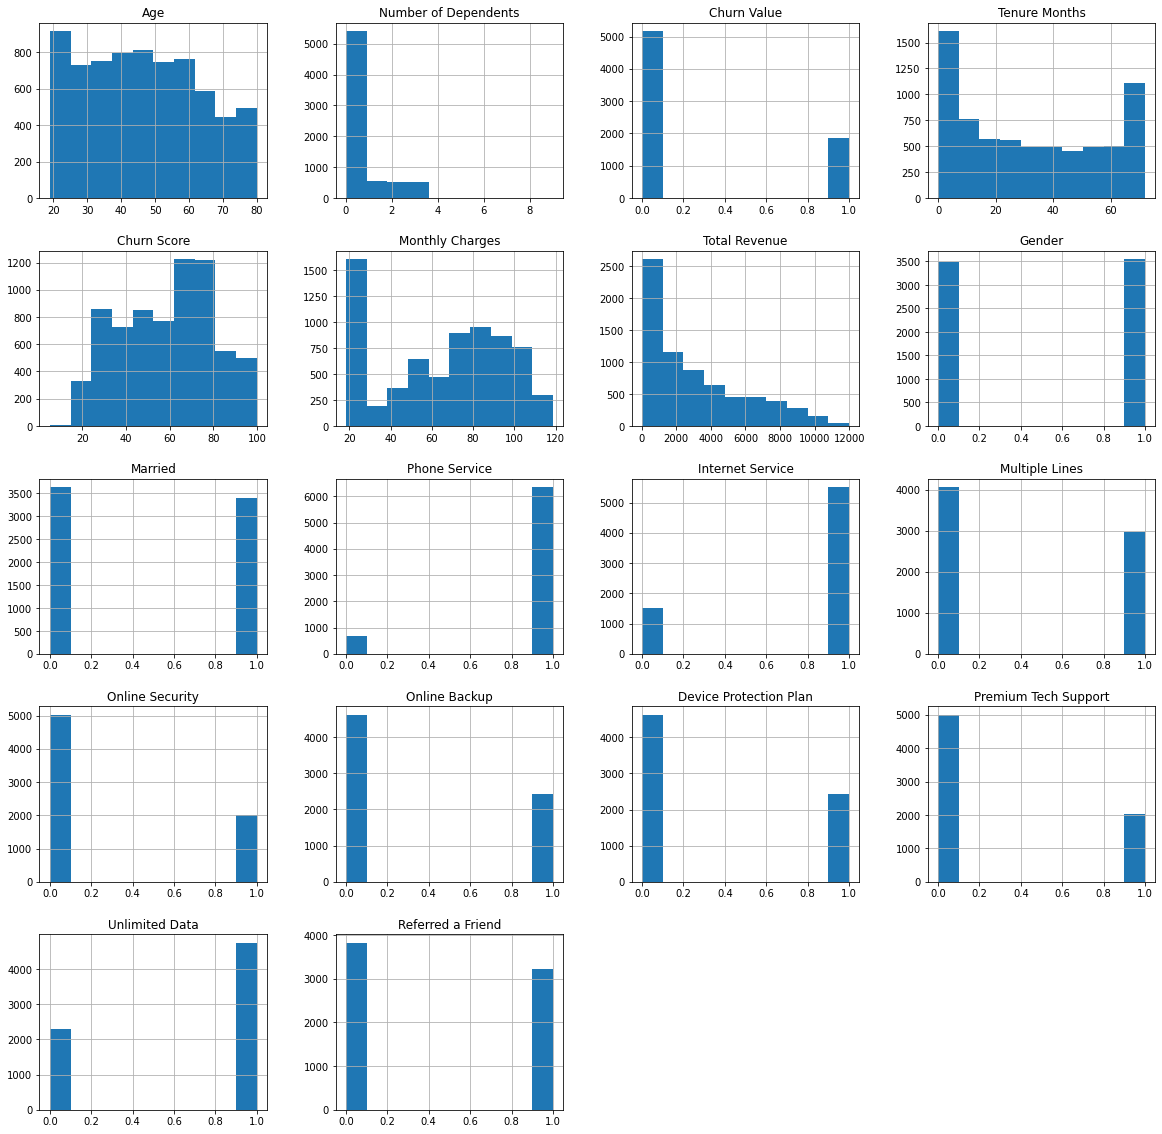

In [19]:
#visualize the distribution of the all features in the dataset
dataset.hist(figsize=(20,20))
plt.show()

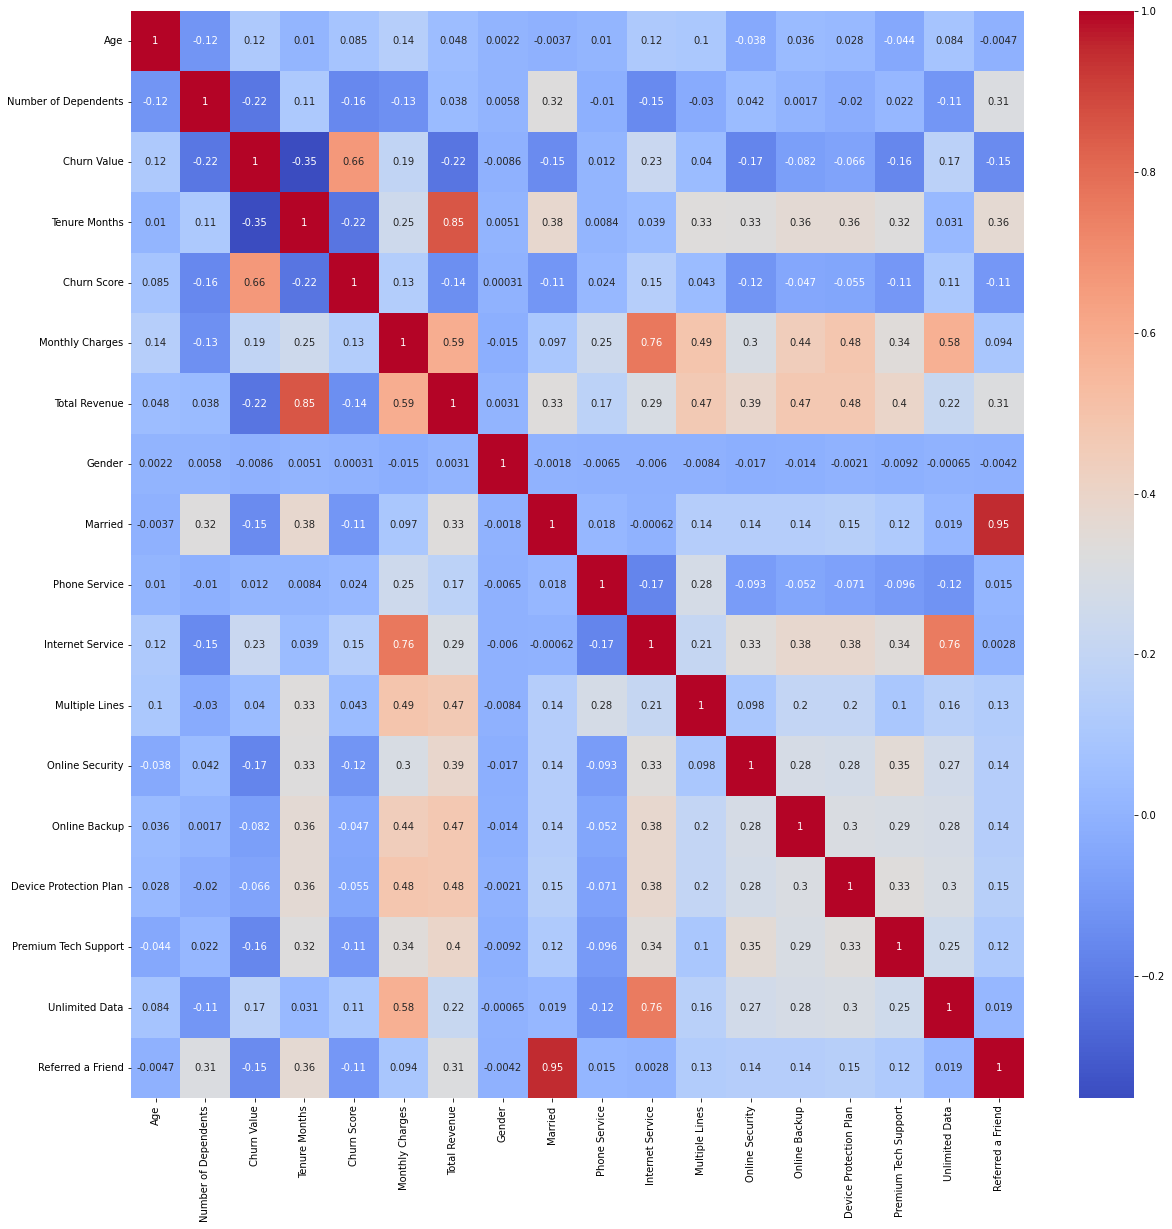

In [20]:
#visualize the correlation between the features
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

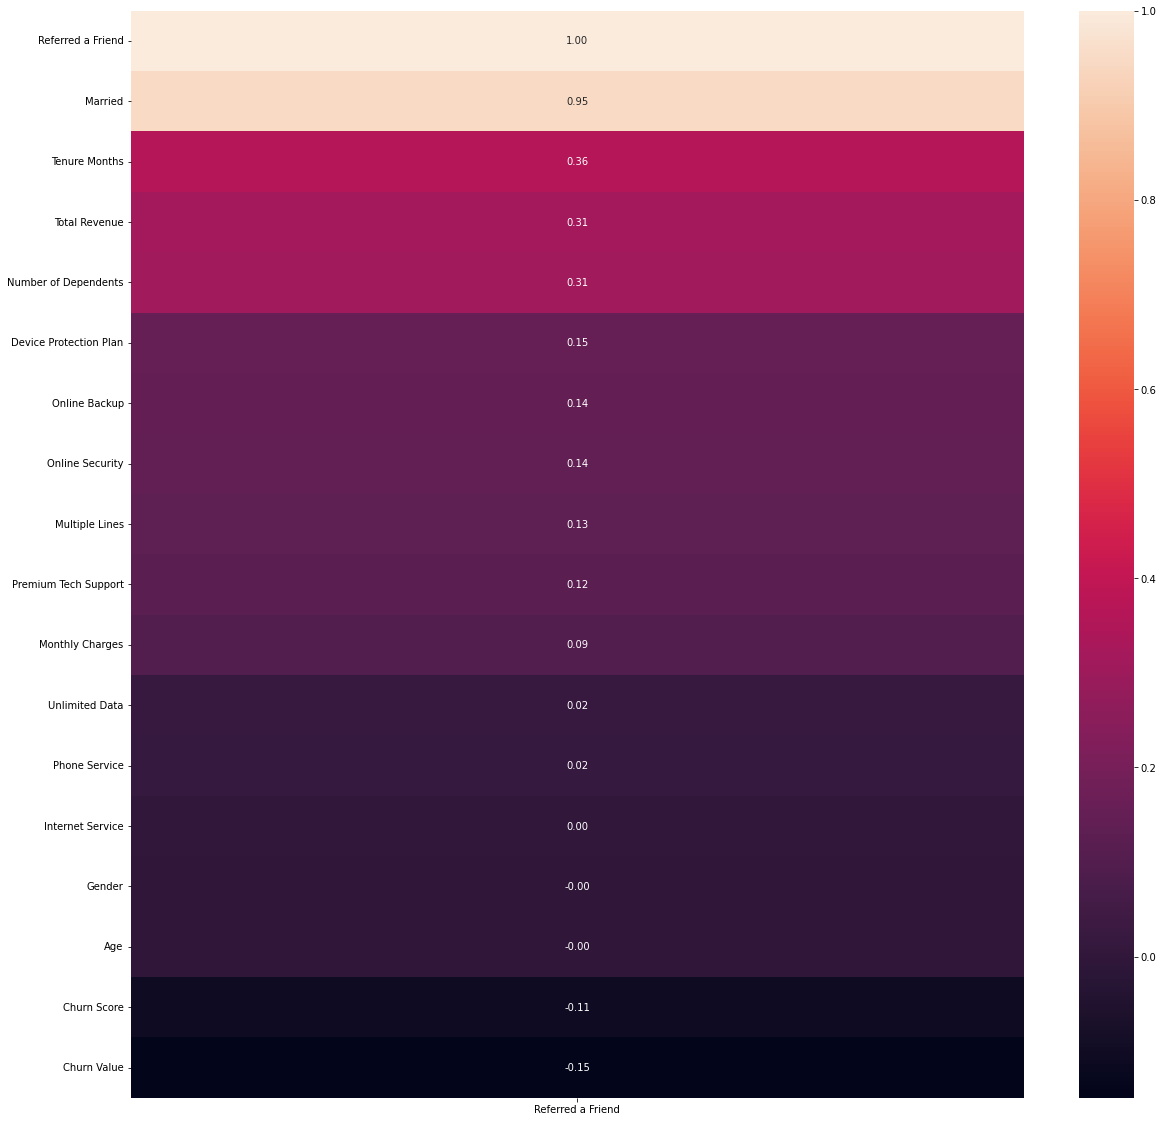

In [21]:
# visualize the correlation between the features and the target variable
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr()[['Referred a Friend']].sort_values(
    by='Referred a Friend', ascending=False), annot=True, fmt='.2f')
plt.show()

##### Insights:

Only feature worth looking at are : 
1. Married
2. Tenure Months
3. Total Revenue
4. Number of Dependents

In [22]:
features = ['Married','Tenure Months','Total Revenue','Number of Dependents','Referred a Friend']
dataset = dataset[features]

In [23]:
dataset.head()

,Married,Tenure Months,Total Revenue,Number of Dependents,Referred a Friend
0,0,1,59.65,0,0
1,1,8,1024.10,1,1
2,0,18,1910.88,3,0
3,1,25,2995.07,1,1
4,1,37,3102.36,1,1


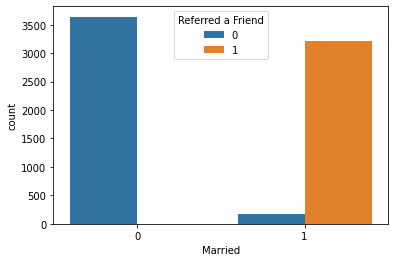

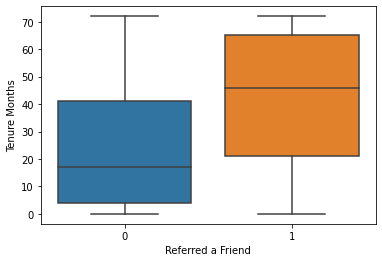

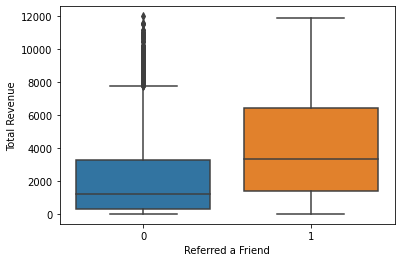

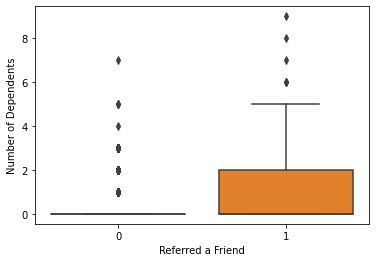

In [24]:
# visualize the distribution of the features vs the target variable (Referred a Friend)
for feature in features:
    if feature == 'Referred a Friend':
        continue
    if feature == 'Married':
        sns.countplot(x=feature, hue='Referred a Friend', data=dataset)
        plt.show()
    else:
        sns.boxplot(x='Referred a Friend', y=feature, data=dataset)
        plt.show()

##### Insights:
1. Married customers are more likely to recommend the company.
2. Total Revenue and Tenure Months are positively correlated with the likelihood of recommending the company. Which means that customers who have been with the company longer and have higher total revenue are more likely to recommend the company.


#### Building Model:

In [25]:
# split the dataset into train and test sets
X = dataset.drop('Referred a Friend', axis=1)
y = dataset['Referred a Friend']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101)

In [26]:
# this function takes in the model, trains it and evaluates it on the test set
# it also uses SequentialFeatureSelector to select the best features for the model
def trainModel(model, X_train, y_train, X_test, y_test):

    # get features range
    feature_range = range(1, len(X_train.columns))

    best_model_accuracy = None
    best_accuracy = 0.0
    best_model_f1 = None
    best_f1 = 0.0
    best_features = None

    # loop through all the features
    for i in feature_range:
        sfs = SequentialFeatureSelector(
            model, n_features_to_select=i, direction='forward')

        # train the model using the training sets
        sfs.fit(X_train, y_train)

        # transform the data sets so that only the selected features are retained
        X_train_sfs = sfs.transform(X_train)
        X_test_sfs = sfs.transform(X_test)

        # Print the selected features
        print("Selected Features for %d Features: %s" %
              (i, X_train.loc[:, sfs.support_].columns))

        # calculate the accuracy of the model using the test sets
        model.fit(X_train_sfs, y_train)

        # predict the response for the test sets
        y_pred = model.predict(X_test_sfs)
        #save the best model and best features based on the accuracy
        if best_accuracy < accuracy_score(y_test, y_pred):
            best_accuracy = accuracy_score(y_test, y_pred)
            best_model_accuracy = sfs
            best_features = sfs.get_support()

        #save the best model and best features based on the f1 score
        if best_f1 < f1_score(y_test, y_pred, average='weighted'):
            best_f1 = f1_score(y_test, y_pred, average='weighted')
            best_model_f1 = sfs
            best_features = sfs.get_support()

    # Print the selected features based on the accuracy
    print("Selected Features for Best Accuracy: %s" %
          (X.loc[:, best_model_accuracy.get_support()].columns))

    # Print best accuracy
    print("Best Accuracy: %f" % (best_accuracy))

    # Print the selected features based on the f1 score
    print("Selected Features for Best F1 Score: %s" %
          (X.loc[:, best_model_f1.get_support()].columns))

    # Print best f1 score
    print("Best F1 Score: %f" % (best_f1))

In [27]:
# train using a logistic regression model
trainModel(LogisticRegression(), X_train, y_train, X_test, y_test)

Selected Features for 1 Features: Index(['Married'], dtype='object')
Selected Features for 2 Features: Index(['Married', 'Tenure Months'], dtype='object')
Selected Features for 3 Features: Index(['Married', 'Tenure Months', 'Total Revenue'], dtype='object')
Selected Features for Best Accuracy: Index(['Married'], dtype='object')
Best Accuracy: 0.970901
Selected Features for Best F1 Score: Index(['Married'], dtype='object')
Best F1 Score: 0.970918


In [28]:
# train using a random forest classifier model
trainModel(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Selected Features for 1 Features: Index(['Married'], dtype='object')
Selected Features for 2 Features: Index(['Married', 'Tenure Months'], dtype='object')
Selected Features for 3 Features: Index(['Married', 'Tenure Months', 'Number of Dependents'], dtype='object')
Selected Features for Best Accuracy: Index(['Married'], dtype='object')
Best Accuracy: 0.970901
Selected Features for Best F1 Score: Index(['Married'], dtype='object')
Best F1 Score: 0.970918


In [29]:
# train using a svm model
trainModel(SVC(), X_train, y_train, X_test, y_test)

Selected Features for 1 Features: Index(['Married'], dtype='object')
Selected Features for 2 Features: Index(['Married', 'Number of Dependents'], dtype='object')
Selected Features for 3 Features: Index(['Married', 'Tenure Months', 'Number of Dependents'], dtype='object')
Selected Features for Best Accuracy: Index(['Married'], dtype='object')
Best Accuracy: 0.970901
Selected Features for Best F1 Score: Index(['Married'], dtype='object')
Best F1 Score: 0.970918


#### Results analysis:
It could be that customers who are married have larger social networks and are more likely to recommend services to others, or that they have a higher level of trust in the telecommunications company. Alternatively, it could be that the company has targeted marketing campaigns towards married customers that have been successful in encouraging them to refer friends.

To make use of this insight, the telecommunications company could consider implementing targeted marketing campaigns aimed at married customers to encourage them to refer friends. For example, they could offer special incentives or promotions for referrals, or provide additional support to help customers make referrals. Additionally, the company could explore the possibility of expanding their customer base among married individuals through targeted marketing initiatives.